### Adv. Hydrology Project: Analysis of different forcing data on SUMMA simulations of snow
---

#### What are the impacts of using remotely sensed incoming radiation data (CERES) versus in situ measurements (CUES) on modeling temporal snow patterns?

SUMMA model sensitivity analysis comparing model runs using radiation forcing data from:
* [CUES snow study site data](https://snow.ucsb.edu/)
* [CERES remote sensing derived products](https://eosweb.larc.nasa.gov/project/ceres/syn1deg-day_ed4a)

Snow pattern evaluation variables:
* April 1st SWE
* Peak SWE accumulation
* Snow disappearance date
* Snow surface temperature
***

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
from datetime import datetime
import numpy as np

In [2]:
# load outputs from both model runs
cues = xr.open_dataset('output/output_cues.nc')
ceres = xr.open_dataset('output/output_cues-ceres.nc')

***
### SWE Timelines:

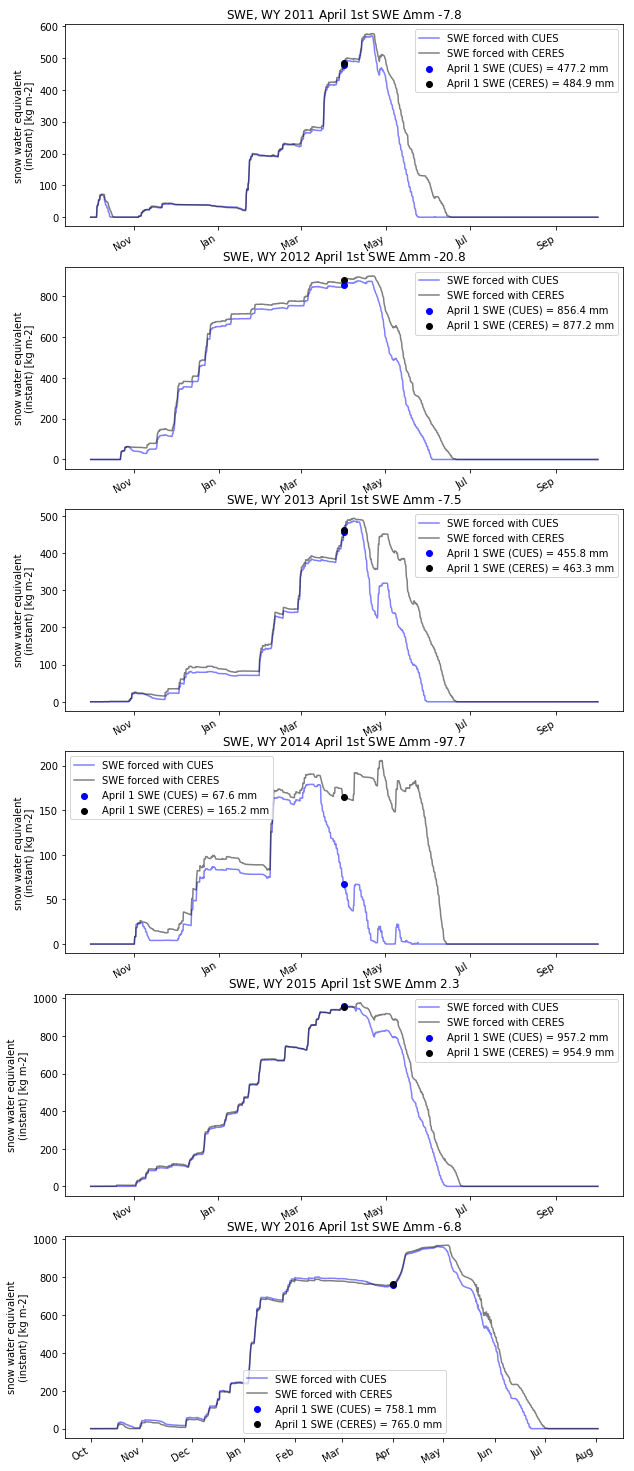

In [73]:
# Plot SWE timelines

# Define our water years
water_years = np.array(np.linspace(2011,2016,6),dtype='int32')

# initialize plots
fig, ax = plt.subplots(len(water_years),1,figsize=(10,26))

i=0 # for interating over subplots

for year in water_years: # plot each water year individually
    
    # Plot April 1st SWE from both model runs
    april1 = datetime.strptime('{}-04-01 00:00:00'.format(year+1),'%Y-%m-%d %H:%M:%S')
    ax[i].scatter(april1, cues.scalarSWE.loc[april1].values[0],
           color='b',label='April 1 SWE (CUES) = {} mm'.format((np.round(cues.scalarSWE.loc[april1].values[0],1))))
    ax[i].scatter(april1, ceres.scalarSWE.loc[april1].values[0],
           color='k',label='April 1 SWE (CERES) = {} mm'.format(np.round(ceres.scalarSWE.loc[april1].values[0],1)))
    
    # Plot SWE from both model runs
    cues.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='b',linestyle='-',alpha=0.5,
                                                                              label='SWE forced with CUES')
    ceres.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='k',linestyle='-',alpha=0.5,
                                                                               label='SWE forced with CERES')
    
    # Format the plot for this water ayear
    ax[i].set_title('SWE, WY {} April 1st SWE $\Delta$mm {}'.format(year,np.round(cues.scalarSWE.loc[april1].values[0]-ceres.scalarSWE.loc[april1].values[0],1)))
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    
    # iterate for subplots
    i+=1
    
fig.savefig('swe_plots.png',dpi=600)

***
### Peak SWE Accumulation date, amount:

In [4]:
# compare SWE accumulation


***
### SWE accumulation, depletion curves

In [ ]:
def get_accumulation(x,t):
    '''get array of values from x that are accumulating'''
    c = 0 # accumulation indexer
    accum = [x[0]] # initialize with our first value
    accum_t = [t[0]]
    for n in range(1,len(x)):
        if x[n] >= accum[c]: # if SWE is greater or equal than previous day
            accum.append(x[n]) # add to accumulation
            accum_t.append(t[n])
            c+=1 # accumulation indexer
    return np.array([accum, accum_t]) # return np array of accumulation and time

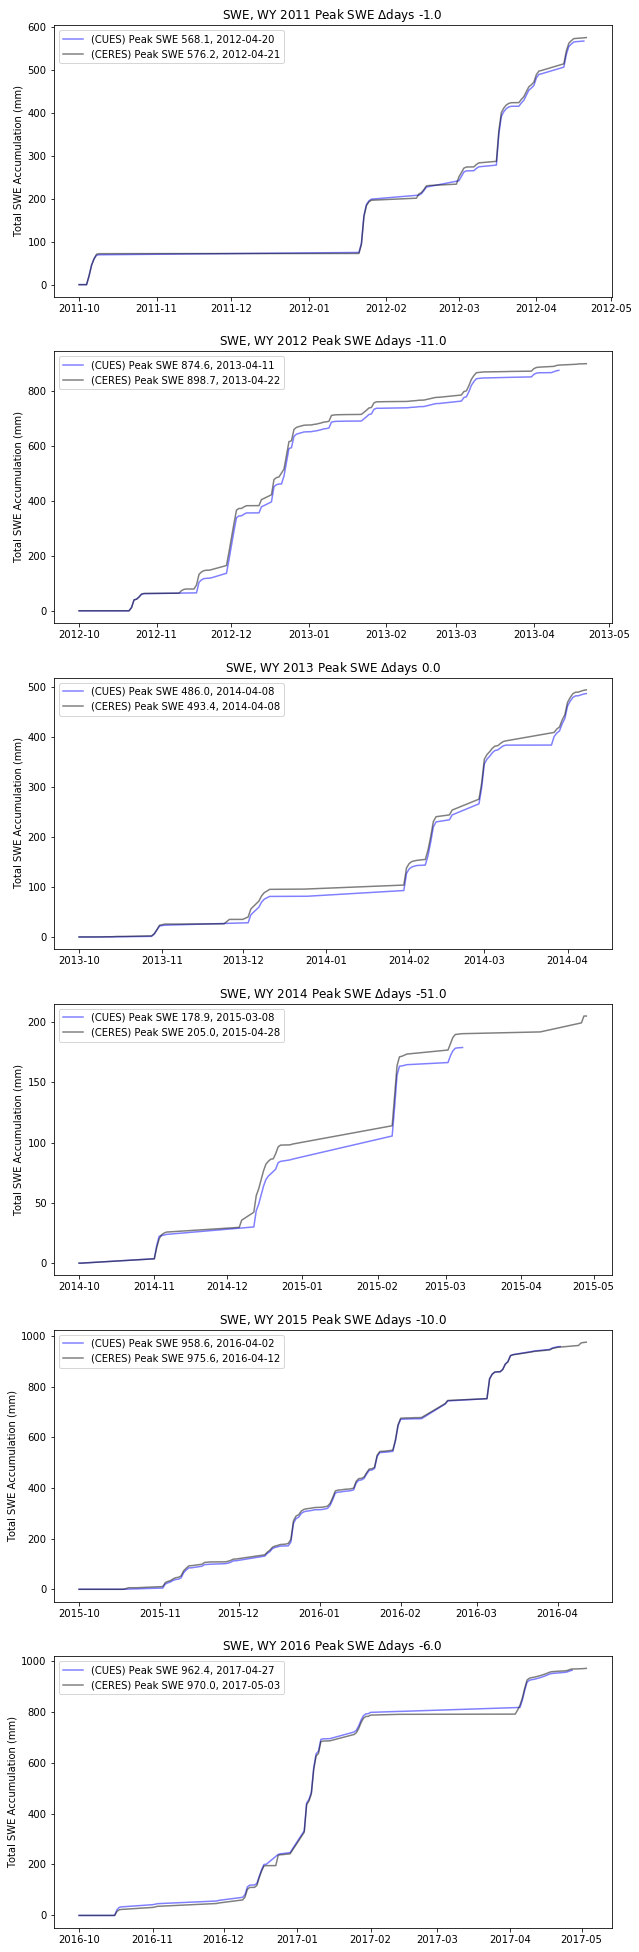

In [71]:
# compare SWE accumulation curves
water_years = np.array(np.linspace(2011,2016,6),dtype='int32') # define our water years

# resample to daily mean SWE values
cues_daily_mean = cues.scalarSWE.resample(time='1D').mean()
ceres_daily_mean = ceres.scalarSWE.resample(time='1D').mean()

fig, ax = plt.subplots(len(water_years),1,figsize=(10,35))
i=0
for year in water_years:
    # compute and plot SWE accumulation curves for each water year
    cues_swe_accum = get_accumulation(cues_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                      cues_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    ceres_swe_accum = get_accumulation(ceres_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                       ceres_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    
    # Plot SWE accumulation curves
    ax[i].plot(cues_swe_accum[1],cues_swe_accum[0],
               color='b',linestyle='-',alpha=0.5,
               label='(CUES) Peak SWE {}, {}'.format(np.round(cues_swe_accum[0].max(),1),
                                                     np.datetime_as_string(cues_swe_accum[1].max())[0:10]))
    ax[i].plot(ceres_swe_accum[1],ceres_swe_accum[0],
               color='k',linestyle='-',alpha=0.5,
               label='(CERES) Peak SWE {}, {}'.format(np.round(ceres_swe_accum[0].max(),1),
                                                      np.datetime_as_string(ceres_swe_accum[1].max())[0:10]))
    
              
    
    ax[i].set_title('SWE, WY {} Peak SWE $\Delta$days {}'.format(year,
                                                              (cues_swe_accum[1].max()-ceres_swe_accum[1].max()).astype('timedelta64[D]') / np.timedelta64(1, 'D')))
    ax[i].legend()
    #ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Total SWE Accumulation (mm)')
    i+=1

fig.savefig('swe_accum_plots.png',dpi=600)

In [7]:


# compare SWE depletion curves

***
### Snow disappearance date

In [8]:
# compare snow disappearance date

***
### Snow surface temperature

In [9]:
# compare snow surface temperature

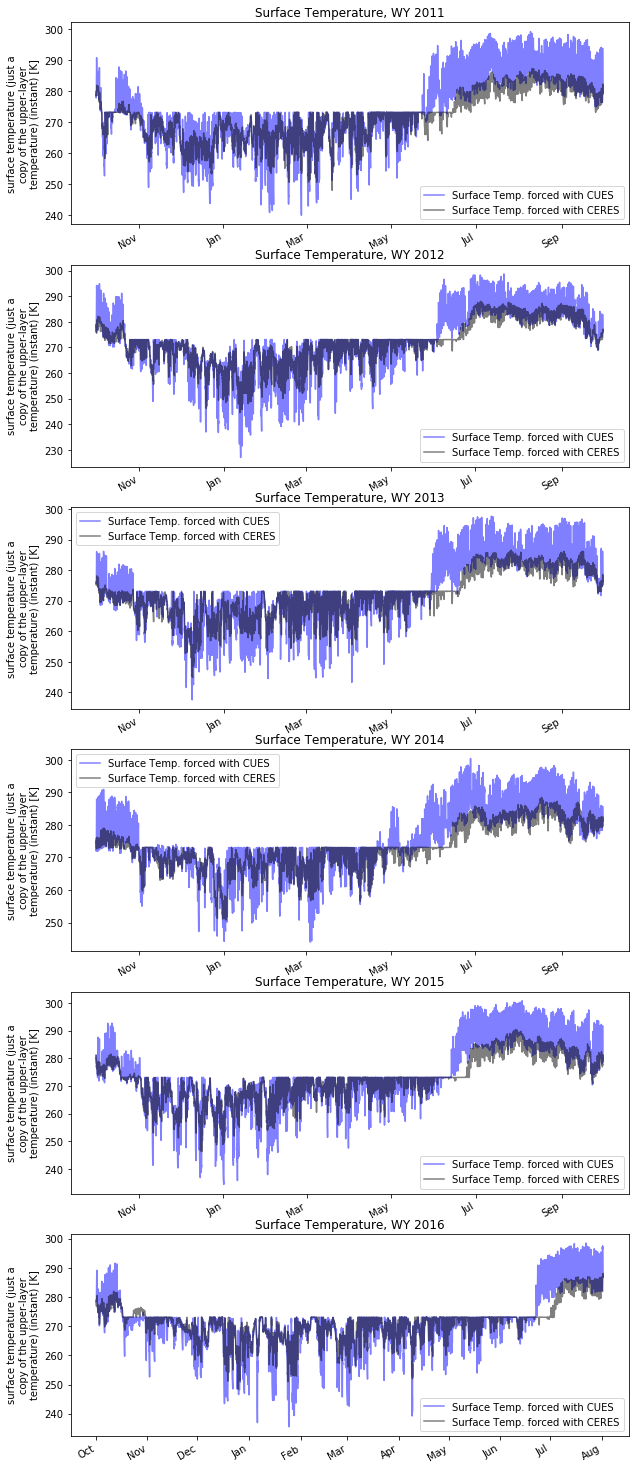

In [192]:
# Plot SWE timelines

# Define our water years
water_years = np.array(np.linspace(2011,2016,6),dtype='int32')

# initialize plots
fig, ax = plt.subplots(len(water_years),1,figsize=(10,26))

i=0 # for interating over subplots

for year in water_years: # plot each water year individually
    
      
    # Plot surface temperature from both model runs
    cues.scalarSurfaceTemp.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='b',linestyle='-',alpha=0.5,label='Surface Temp. forced with CUES')
    ceres.scalarSurfaceTemp.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='k',linestyle='-',alpha=0.5,label='Surface Temp. forced with CERES')
    
    # Format the plot for this water ayear
    ax[i].set_title('Surface Temperature, WY {}'.format(year))
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    
    # iterate for subplots
    i+=1
    
fig.savefig('surface_temp_plots.png',dpi=600)